In [30]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
####################you will need to change some paths here!#####################
#list of input files
dir_in='f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/'
#output files
filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.nc'
filename_out_kml='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.kml'
#################################################################################

In [31]:
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib as mpl
#import openpyxl
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
#from math import cos, radians

In [32]:
#get all filenames
for root, dirs, files in os.walk(dir_in, topdown=False):
    for name in files:
        fname_in=os.path.join(root, name) 

In [33]:
#this goes through each file, concatonates each file and outputs one big file
#the flag == istart_flag is set to zero so that on the first iteration of the loop the array dataset is initialized
istart_flag = 0 
for root, dirs, files in os.walk(dir_in, topdown=False):
    for name in files:
        filename_usv=os.path.join(root, name)
        print(filename_usv)
        dsx = xr.open_dataset(filename_usv)
        dataset2 = xr.open_dataset(filename_usv)
        if istart_flag == 0:
            dataset = dataset2
            istart_flag = 1
            continue
        dataset = xr.concat([dataset, dataset2],'obs')
dataset.to_netcdf(filename_out_nc)


f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\11\saildrone-gen_4-baja_2018-EP-sd1002-20180411T1800-20180411T2359-1_min-v1.1523556150.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\12\saildrone-gen_4-baja_2018-EP-sd1002-20180412T0000-20180412T0559-1_min-v1.1523556160.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\12\saildrone-gen_4-baja_2018-EP-sd1002-20180412T0600-20180412T1159-1_min-v1.1523556169.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\12\saildrone-gen_4-baja_2018-EP-sd1002-20180412T1200-20180412T1759-1_min-v1.1523559604.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\12\saildrone-gen_4-baja_2018-EP-sd1002-20180412T1800-20180412T2359-1_min-v1.1523581204.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\13\saildrone-gen_4-baja_2018-EP-sd1002-20180413T0000-20180413T0559-1_min-v1.1523602803.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/

f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\24\saildrone-gen_4-baja_2018-EP-sd1002-20180424T1800-20180424T2359-1_min-v1.1524618003.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\25\saildrone-gen_4-baja_2018-EP-sd1002-20180425T0000-20180425T0559-1_min-v1.1524639604.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\25\saildrone-gen_4-baja_2018-EP-sd1002-20180425T0600-20180425T1159-1_min-v1.1524661203.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\25\saildrone-gen_4-baja_2018-EP-sd1002-20180425T1200-20180425T1759-1_min-v1.1524682804.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\25\saildrone-gen_4-baja_2018-EP-sd1002-20180425T1800-20180425T2359-1_min-v1.1524704404.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/2018/04\26\saildrone-gen_4-baja_2018-EP-sd1002-20180426T0000-20180426T0559-1_min-v1.1524726003.nc
f:/data/cruise_data/saildrone/baja-2018/daily_files/

In [34]:
#lats=dataset['LAT']
#lons=dataset['LON']
ilen=(len(dataset.LAT['obs']))
dataset.LAT[0,1].values*1


37.8124192

In [35]:
#write a KML path file with the Saildrone data in it
with open(filename_out_kml, "w") as f:
#    f.write("<?xml version="1.0" encoding="UTF-8"?>\n")
    f.write('<Document>\n')
    f.write('\t<name>Paths</name>\n')
    f.write('\t<Style id="yellowLine">\n')
    f.write('\t\t<LineStyle>\n')
    f.write('\t\t\t<color>7f00ffff</color>\n')
    f.write('\t\t\t<width>4</width>\n')
    f.write('\t\t</LineStyle>\n')
    f.write('\t</Style>\n')
    f.write('\t<Placemark>\n')
    f.write('\t\t<LineString>\n')
    f.write('\t\t<coordinates>\n')
    for i in range(0,ilen):
        f.write(str(dataset.LON[0,i].values*1) + ',' + str(dataset.LAT[0,i].values*1) + ',100 \n')
    f.write('\t\t</coordinates> \n')
    f.write('\t\t</LineString>\n')
    f.write('\t</Placemark>\n')
    f.write('</Document>')
     

In [36]:
#saildrone box, get todays mur data to plot on google earth
minlon = -130
maxlon = -110
minlat = 20
maxlat = 40
#use mur grid to find what part of array to read 
dx=360./36000.
dy=180./17999.
ix1=int(round((minlon+(180.-dx))/dx))
ix2=int(round((maxlon+(180.-dx))/dx))
iy1=int(round((minlat+(90.-dy))/dy))
iy2=int(round((maxlat+(90.-dy))/dy))

#get todays date and make strings of days to use in filename
ts_now = dt.datetime.today() - dt.timedelta(days=1)
#print(d)
#ts_now=dt.datetime.now()
#ts_now = ts_now
syr=str(ts_now.year)
smon=str(ts_now.month)
sdym=str(ts_now.day)
sjdy=str(ts_now.timetuple().tm_yday)

#construct filename
#https://data.nodc.noaa.gov/thredds/dodsC/ghrsst/L2P/GOES15/OSPO/2018/083/20180324223000-OSPO-L2P_GHRSST-SSTskin-GOES15-North-v02.0-fv01.0.nc.html
filename_mur = 'http://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/' \
    + syr + '/' + sjdy.zfill(3) + '/' + syr + smon.zfill(2) + sdym.zfill(2) + \
    '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
print(filename_mur)
print(ix1,ix2,iy1,iy2)
#read data into xarray dataset_mur then subset sst    
dataset_mur = xr.open_dataset(filename_mur)
sst=dataset_mur.analysed_sst[0,iy1:iy2,ix1:ix2]
print(sst.shape)
#output to kml file now, matlab code somewhere that does this I think look on f drive




http://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2018/120/20180430090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
4999 6999 10998 12998
(2000, 2000)


In [ ]:
#read in viirs data files for last 3 days for region and overwrite with newer data
#see ken's email about opendap access for viirs
f1='F:/data/cruise_data/saildrone/baja-2018/viirs/podaac-ftp.jpl.nasa.gov/'
f2='allData/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/001/20180101000000'
f3='-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc'
filename_viirs=f1+f2+f3
dataset_viirs = xr.open_dataset(filename_viirs)


In [219]:
#dataset
#d2=dataset[df.lon>-130 and df.lon<100 and df.lat<40 and df.lat>20]
sst=dataset.sea_surface_temperature[0,2499:3499,2499:3999]
qual=dataset.quality_level[0,2499:3499,2499:3999]
xlon=dataset.lon[2499:3999]
xlat=dataset.lat[2499:3499]
lons,lats = np.meshgrid(xlon,xlat)

#sst.mean()
sst.fillna(-4.0)
#lons.shape
#sst.shape
#print(xlat.values[3499])
#print(xlon.min())

<xarray.DataArray 'sea_surface_temperature' (lat: 1000, lon: 1500)>
array([[-4., -4., -4., ..., -4., -4., -4.],
       [-4., -4., -4., ..., -4., -4., -4.],
       [-4., -4., -4., ..., -4., -4., -4.],
       ...,
       [-4., -4., -4., ..., -4., -4., -4.],
       [-4., -4., -4., ..., -4., -4., -4.],
       [-4., -4., -4., ..., -4., -4., -4.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -130.01 -129.99 -129.97 -129.95 -129.93001 ...
  * lat      (lat) float32 40.010002 39.99 39.97 39.95 39.93 39.91 39.89 ...
    time     datetime64[ns] 2018-01-01
Attributes:
    comment:        SST obtained by regression with buoy measurements, sensit...
    long_name:      sea surface sub-skin temperature
    source:         NOAA
    standard_name:  sea surface sub-skin temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [ ]:
f1='F:/data/cruise_data/saildrone/baja-2018/viirs/podaac-ftp.jpl.nasa.gov/'
f2='allData/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/001/20180101000000'
f3='-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc'
filename_viirs=f1+f2+f3
dataset_viirs = xr.open_dataset(filename_viirs)
#df = dataset.to_dataframe()

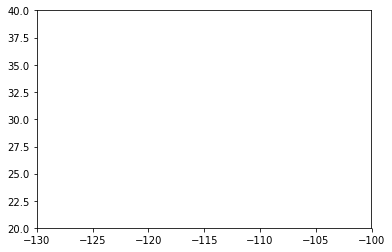

In [220]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create map
#map = Basemap(projection='merc', lat_0 = 45, lon_0 = -130,    resolution = 'l', area_thresh = 0.1,    
#              llcrnrlon=-180.25, llcrnrlat=30.0,urcrnrlon=-115.25, urcrnrlat=62.75)
#map.fillcontinents(color = 'coral')
#x,y = map(dataset.lon.values,dataset.lat.values)
# = np.linspace(270, 310, 21)
#cs=map.pcolormesh(lons,lats, sst, cmap=plt.cm.jet)
fig, ax = plt.subplots()
extent = (xlon.min(), xlon.max(), xlat.min(), xlat.max())
im = ax.pcolormesh(xlon,xlat,sst-273.15, cmap=plt.cm.jet, vmin=10, vmax=30)


#fig1 = plt.figure()
#cs = map.pcolor(x,y,sst,cmap=plt.cm.jet)
#map.drawcoastlines()
plt.show()